In [17]:
import gzip
import json

data = []
with gzip.open("dataset0.json.gz", "rt") as f:
    for line in f:
        data.append(json.loads(line))
 


In [20]:
data[1]

{'ENST00000000233': {'261': {'CAAACTG': [[0.0126,
     1.95,
     111.0,
     0.0125,
     1.27,
     108.0,
     0.00996,
     2.94,
     101.0],
    [0.00432, 2.35, 111.0, 0.00559, 2.4, 106.0, 0.00332, 1.39, 94.5],
    [0.00266, 3.81, 108.0, 0.00645, 3.59, 108.0, 0.00827, 2.12, 93.3],
    [0.00498, 2.79, 109.0, 0.0206, 3.68, 111.0, 0.00303, 6.33, 92.4],
    [0.00664, 2.68, 114.0, 0.0104, 2.22, 108.0, 0.00232, 5.59, 89.2],
    [0.00564, 3.19, 108.0, 0.0083, 8.05, 100.0, 0.00744, 2.17, 93.4],
    [0.00797, 2.86, 111.0, 0.00289, 3.25, 109.0, 0.00432, 2.86, 97.7],
    [0.00398, 2.56, 109.0, 0.00232, 2.73, 101.0, 0.0208, 3.22, 94.0],
    [0.0116, 2.42, 110.0, 0.0091, 3.22, 109.0, 0.0113, 2.53, 94.8],
    [0.00797, 4.86, 108.0, 0.00831, 3.07, 110.0, 0.00465, 1.76, 91.8],
    [0.0186, 4.31, 109.0, 0.00232, 1.94, 104.0, 0.0193, 3.1, 93.1],
    [0.00529, 2.68, 106.0, 0.00266, 0.789, 104.0, 0.00564, 3.81, 92.6],
    [0.0153, 17.0, 108.0, 0.00442, 3.06, 110.0, 0.00764, 2.37, 93.0],
    [0.00598

In [41]:
def get_id_and_position(data):
    id = list(data.keys())[0]
    position = list(data[id].keys())[0]
    return id, position

def get_features(data):
    id, position = get_id_and_position(data)
    return list(data[id][position].values())[0]

get_id_and_position(data[0])
get_features(data[0])

[[0.00299, 2.06, 125.0, 0.0177, 10.4, 122.0, 0.0093, 10.9, 84.1],
 [0.00631, 2.53, 125.0, 0.00844, 4.67, 126.0, 0.0103, 6.3, 80.9],
 [0.00465, 3.92, 109.0, 0.0136, 12.0, 124.0, 0.00498, 2.13, 79.6],
 [0.00398, 2.06, 125.0, 0.0083, 5.01, 130.0, 0.00498, 3.78, 80.4],
 [0.00664, 2.92, 120.0, 0.00266, 3.94, 129.0, 0.013, 7.15, 82.2],
 [0.0103, 3.83, 123.0, 0.00598, 6.45, 126.0, 0.0153, 1.09, 74.8],
 [0.00398, 3.75, 126.0, 0.00332, 4.3, 129.0, 0.00299, 1.93, 81.9],
 [0.00498, 3.93, 127.0, 0.00398, 2.51, 131.0, 0.0111, 3.47, 79.4],
 [0.0139, 4.69, 106.0, 0.0136, 6.21, 124.0, 0.00531, 10.6, 85.5],
 [0.00631, 3.5, 126.0, 0.0222, 5.38, 128.0, 0.00332, 1.72, 79.3],
 [0.0061, 3.99, 121.0, 0.0121, 7.27, 122.0, 0.00232, 1.27, 78.9],
 [0.00299, 1.99, 128.0, 0.00427, 4.85, 124.0, 0.00332, 3.18, 80.5],
 [0.0186, 3.62, 124.0, 0.00428, 2.25, 129.0, 0.00554, 2.78, 80.1],
 [0.0093, 3.12, 125.0, 0.00398, 8.84, 129.0, 0.00361, 1.86, 82.0],
 [0.00365, 2.92, 126.0, 0.00698, 3.7, 126.0, 0.00467, 3.23, 80.2],
 

In [26]:
import pandas as pd

# Read the labelled info file
df_labels = pd.read_csv("data.info.labelled")

print(df_labels.head())

           gene_id    transcript_id  transcript_position  label
0  ENSG00000004059  ENST00000000233                  244      0
1  ENSG00000004059  ENST00000000233                  261      0
2  ENSG00000004059  ENST00000000233                  316      0
3  ENSG00000004059  ENST00000000233                  332      0
4  ENSG00000004059  ENST00000000233                  368      0


In [40]:
label_dict = {
    (row.transcript_id, row.transcript_position): row.label
    for row in df_labels.itertuples(index=False)
}

label_dict.get(("ENST00000000233", 244), None)


0

In [59]:
t = 0
f = 0
for k, v in label_dict.items():
    if v == 1:
        t += 1
    else:
        f += 1

print(t/(f+t))

0.044936719250151844


In [18]:
import numpy as np

def aggregate_reads(reads):
    arr = np.array(reads)  # shape: (n_reads, 9)
    features = np.concatenate([
        arr.mean(axis=0),
        arr.std(axis=0),
        arr.min(axis=0),
        arr.max(axis=0),
        np.median(arr, axis=0),
    ])
    return features

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = []
y = []

for entry in data:
    id, position = get_id_and_position(entry)
    features = get_features(entry)
    label = label_dict.get((id, int(position)), None)
    X.append(aggregate_reads(features))
    y.append(label)

X = np.array(X)
y = np.array(y)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=5000, solver='lbfgs', class_weight='balanced')
)
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=5000))])

In [61]:
from sklearn.metrics import roc_auc_score

y_pred = model.predict_proba(X_val)[:, 1]
print("AUC:", roc_auc_score(y_val, y_pred))


AUC: 0.822474424516359


In [62]:
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [63]:
from sklearn.metrics import roc_auc_score, average_precision_score

roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR AUC:  {pr_auc:.4f}")

ROC AUC: 0.8254
PR AUC:  0.1953


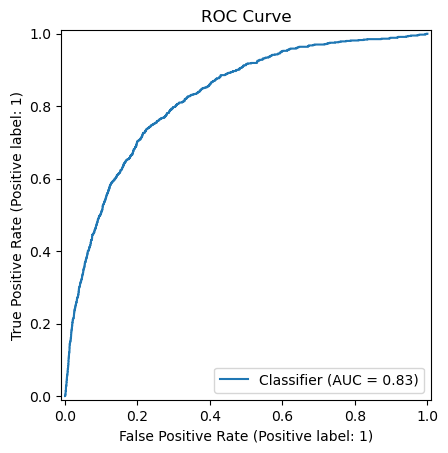

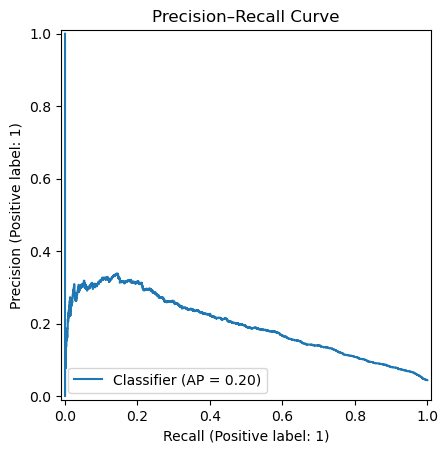

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("ROC Curve")
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Precision–Recall Curve")
plt.show()


In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=None,        # let trees expand fully
    random_state=42,       # reproducibility
    class_weight='balanced' # good for imbalanced data
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

Validation ROC AUC: 0.908
Validation PR AUC: 0.421
Test ROC AUC: 0.906
Test PR AUC: 0.430


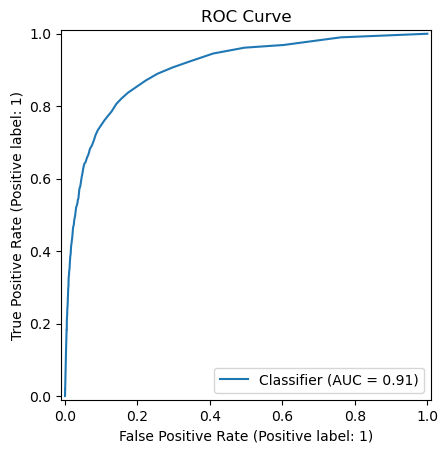

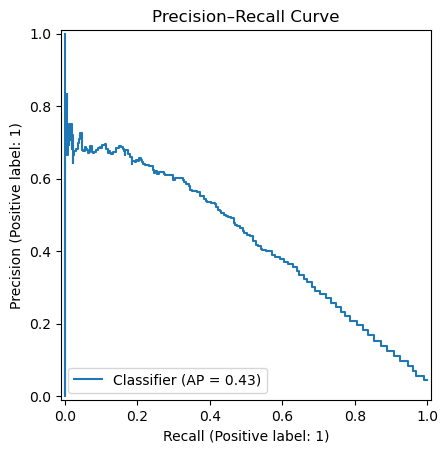

In [68]:
from sklearn.metrics import roc_auc_score, average_precision_score

# Predict probabilities for ROC and PR curve metrics
y_val_pred_proba = rf.predict_proba(X_val)[:, 1]
y_test_pred_proba = rf.predict_proba(X_test)[:, 1]

# ROC AUC
roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

# PR AUC (Average Precision)
pr_auc_val = average_precision_score(y_val, y_val_pred_proba)
pr_auc_test = average_precision_score(y_test, y_test_pred_proba)

print(f"Validation ROC AUC: {roc_auc_val:.3f}")
print(f"Validation PR AUC: {pr_auc_val:.3f}")
print(f"Test ROC AUC: {roc_auc_test:.3f}")
print(f"Test PR AUC: {pr_auc_test:.3f}")

RocCurveDisplay.from_predictions(y_test, y_test_pred_proba)
plt.title("ROC Curve")
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_test_pred_proba)
plt.title("Precision–Recall Curve")
plt.show()

In [ ]:
def function(x):
    for i in range(1:100):
        temp = i*i
        temp2 = temp*i
        temp3 =temp2+temp
    return temp3+x